In [ ]:
'''
make a for loop or maybe just a for loop that rotates
though the features of our telco churn data at the begining of the exlore phase to look for 
any possible relationships. 

'''

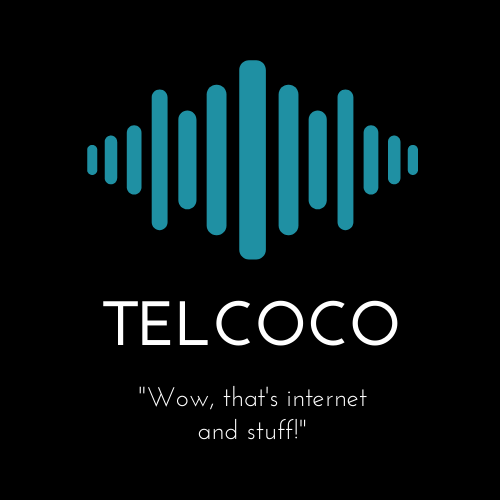

# Part III

 - Explore your telco data to discover drivers of churn
 - Determine if certain columns should be dropped
 - Determine if it would be valuable to bin some numeric columns
 - Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [1]:
#data manipulations
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#stats is great
from scipy import stats

#my own files with my own functions
import acquire
import prepare

# train test split function
from sklearn.model_selection import train_test_split

#### Acquire phase

In [2]:
# acquire data
df = acquire.get_telco_data()

In [3]:
# checking data
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
# look at original df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

> We can drop some SQL joiner columns and change some values (tota_charges) to run stats tests.

#### Prepare phase

In [5]:
# prepare data with function from prepare module
prepare.prep_telco(df)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,No,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,No,One year,DSL,Mailed check
1,Male,No,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.40,No,Month-to-month,DSL,Mailed check
2,Male,No,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,Yes,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,Yes,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.90,No,One year,DSL,Mailed check
7039,Male,No,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check
7040,Male,No,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,Male,No,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [6]:
# check df after prepare
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   object 
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

> columns have been dropped and values have been changed

#### Explore phase
 - only using TRAIN data during this phase!

In [7]:
# split data with function from prepare module
# check split function on telco_churn with churn as the target variable
train, validate, test = prepare.split_data(df, 'churn')

train: 4225 (60.0% of 7043)
validate: 1409 (20.0% of 7043)
test: 1409 (20.0% of 7043)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 2865 to 5354
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 4225 non-null   object 
 1   senior_citizen         4225 non-null   object 
 2   partner                4225 non-null   object 
 3   dependents             4225 non-null   object 
 4   tenure                 4225 non-null   int64  
 5   phone_service          4225 non-null   object 
 6   multiple_lines         4225 non-null   object 
 7   online_security        4225 non-null   object 
 8   online_backup          4225 non-null   object 
 9   device_protection      4225 non-null   object 
 10  tech_support           4225 non-null   object 
 11  streaming_tv           4225 non-null   object 
 12  streaming_movies       4225 non-null   object 
 13  paperless_billing      4225 non-null   object 
 14  monthly_charges        4225 non-null   float64
 15  total_

In [10]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
2865,Female,Yes,Yes,No,38,Yes,Yes,Yes,Yes,No,No,No,Yes,No,95.00,3591.25,No,One year,Fiber optic,Credit card (automatic)
4107,Female,Yes,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.35,139.05,Yes,Month-to-month,Fiber optic,Electronic check
3453,Male,Yes,Yes,No,11,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.95,214.75,Yes,Month-to-month,No internet service,Mailed check
923,Male,No,No,No,10,Yes,Yes,No,No,No,No,Yes,No,Yes,86.05,834.10,Yes,Month-to-month,Fiber optic,Bank transfer (automatic)
2370,Male,No,No,No,43,Yes,No,No,Yes,No,No,No,Yes,Yes,60.00,2548.55,No,Two year,DSL,Electronic check


Create two lists, one with all categorical variables and one with all continuous vaiables, this is important because it will determine what stats test to use.





After splitting data, I can now separate variables into two categories: continuous and categorical

This is done according to my own specifications. 

I chose to consider everything as cat except for two variables

In [11]:
# make two lists, one with all categorical variables and another with all continouus vairables
#intializing empty lists
cat_col = []
con_col = []

#looping through all columns
for col in train.columns:
        #finding all my categorical columns by checking for how many unique values
        # if less than 100, append to cat_col
        if train[col].nunique() < 100:
            cat_col.append(col)
        else: 
            #if it has more than 100 unique values, append to continous column variable
            con_col.append(col)

I would not normally use 100 as a cut off but I'm familiar with this data and plan on changing the tenure variable by binning the values into years later. Next time I may change my prepare function to bin tenure into yearly values which only goes from 0 to 6 years

In [12]:
# check lists
cat_col 

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [13]:
con_col

['monthly_charges', 'total_charges']

Question: Can I make a for loop to quickly explore all features against target?

Will I need two different for loops? one for categorical vs target and another for continuous vs target.

first for loop  will use a crosstab so it works well with categorical variables vs target (a cat_col). 

second uses a boxplot for continuous variables vs target (a cat_col)

 to make a for loop that prints contingency tables with features vs target I should remove churn from my cat_col by creating a new list

In [14]:
# Target variable is churn
target_variable = 'churn'

# Initialize an empty list to store columns for comparison
columns_to_compare = []

# Create a for loop to iterate through each column in the categorical column list
# appending our comparision list as long as the column is not churn
for column in cat_col:
    if column != target_variable:
        columns_to_compare.append(column)
    else:
        pass

only need to do this for cat_col becuase con_col does not have churn.

In [15]:
columns_to_compare

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'contract_type',
 'internet_service_type',
 'payment_type']


Contingency Table for gender vs. churn:

churn     No  Yes
gender           
Female  1550  559
Male    1554  562


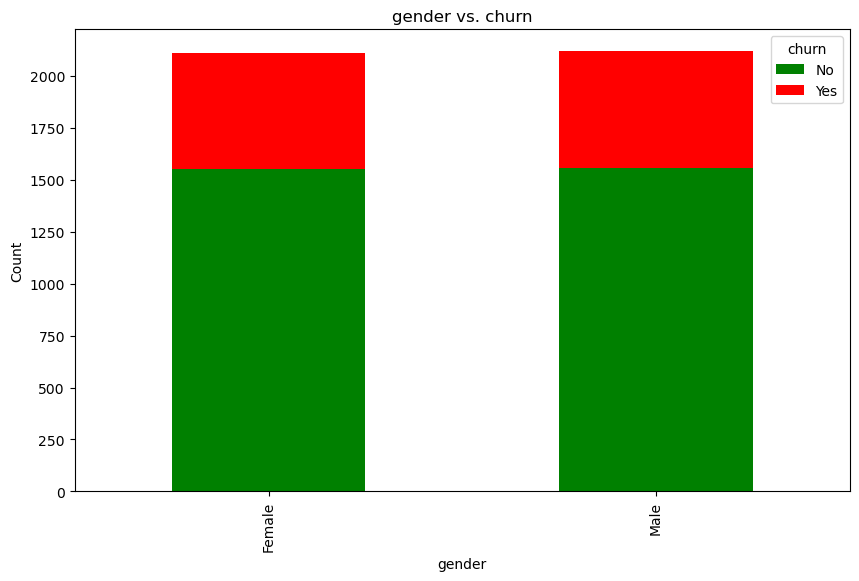


Contingency Table for senior_citizen vs. churn:

churn             No  Yes
senior_citizen           
No              2696  835
Yes              408  286


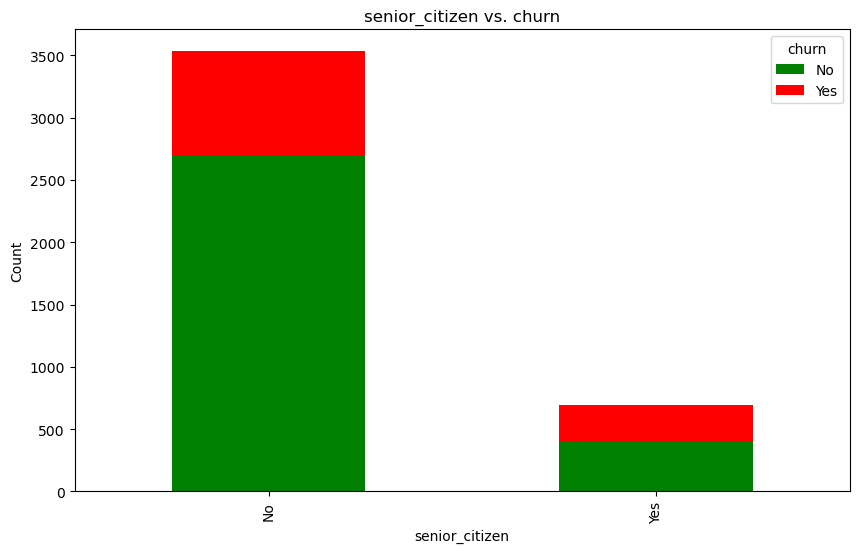


Contingency Table for partner vs. churn:

churn      No  Yes
partner           
No       1445  715
Yes      1659  406


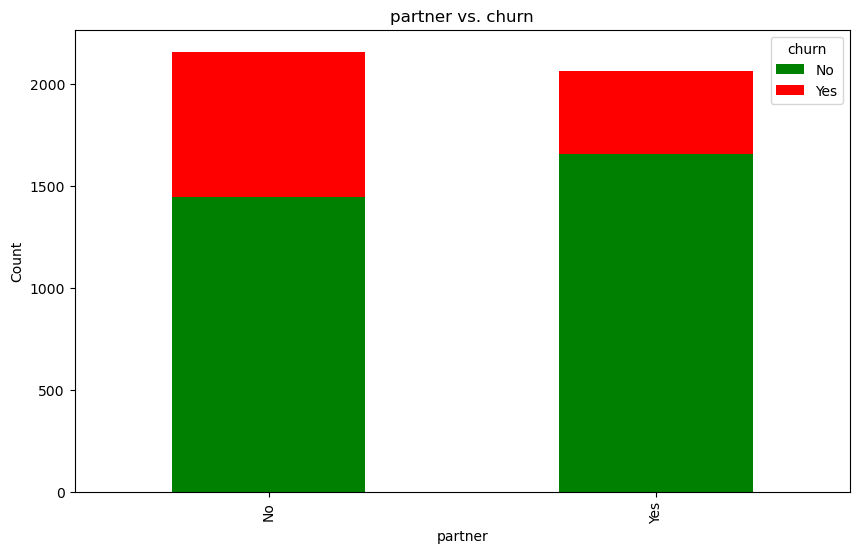


Contingency Table for dependents vs. churn:

churn         No  Yes
dependents           
No          2042  919
Yes         1062  202


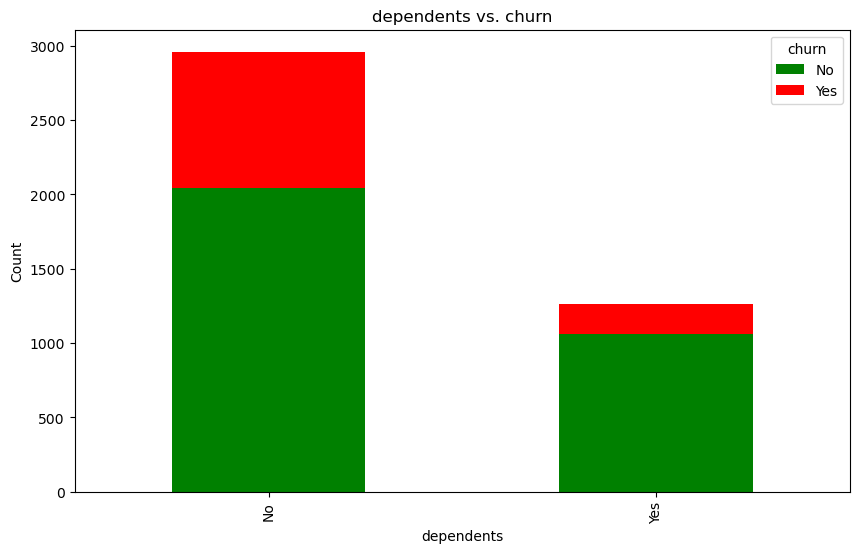


Contingency Table for tenure vs. churn:

churn    No  Yes
tenure          
0         8    0
1       128  225
2        61   81
3        67   57
4        57   51
...     ...  ...
68       51    6
69       60    4
70       65    5
71       94    4
72      228    5

[73 rows x 2 columns]


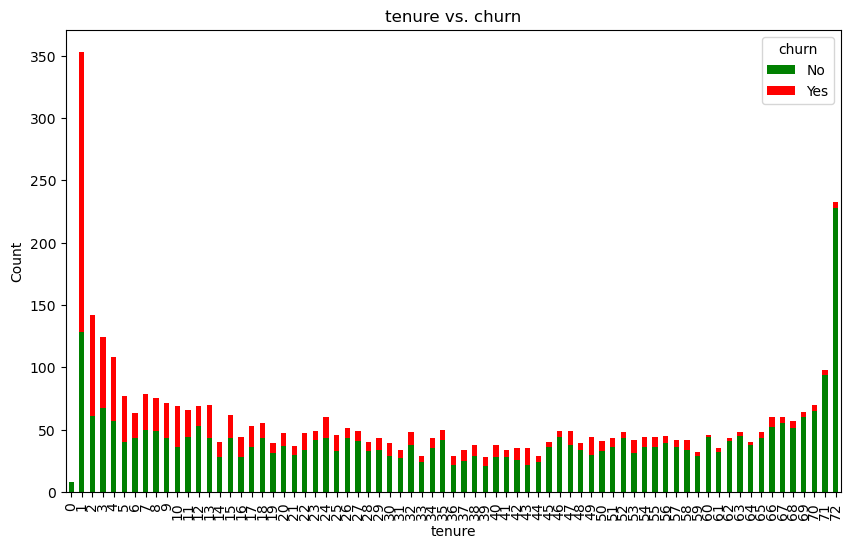


Contingency Table for phone_service vs. churn:

churn            No   Yes
phone_service            
No              295    99
Yes            2809  1022


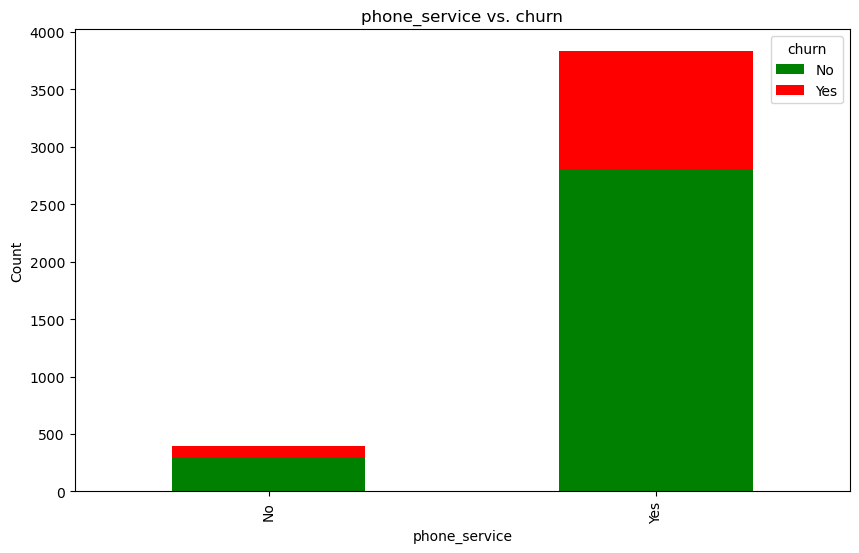


Contingency Table for multiple_lines vs. churn:

churn               No  Yes
multiple_lines             
No                1500  520
No phone service   295   99
Yes               1309  502


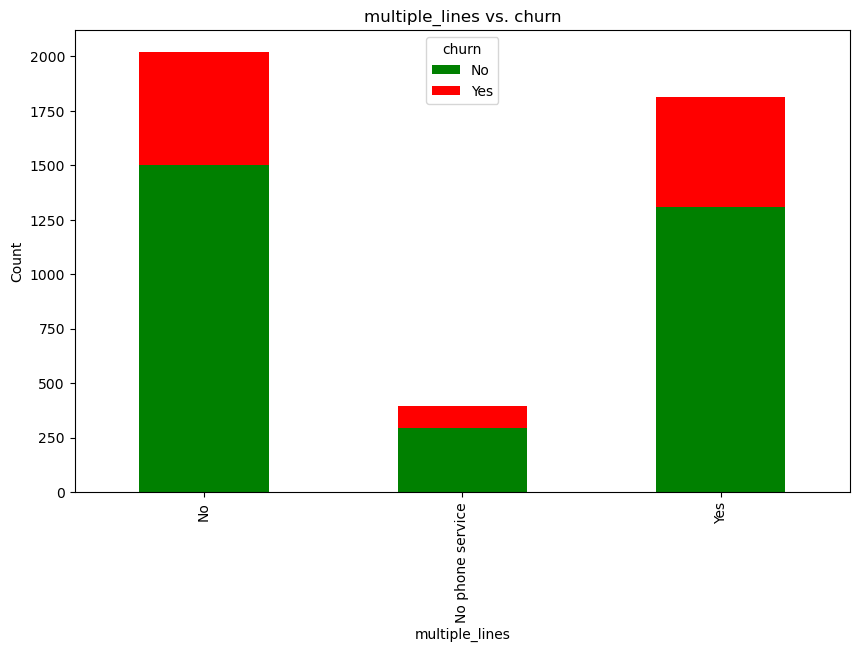


Contingency Table for online_security vs. churn:

churn                  No  Yes
online_security               
No                   1230  885
No internet service   848   70
Yes                  1026  166


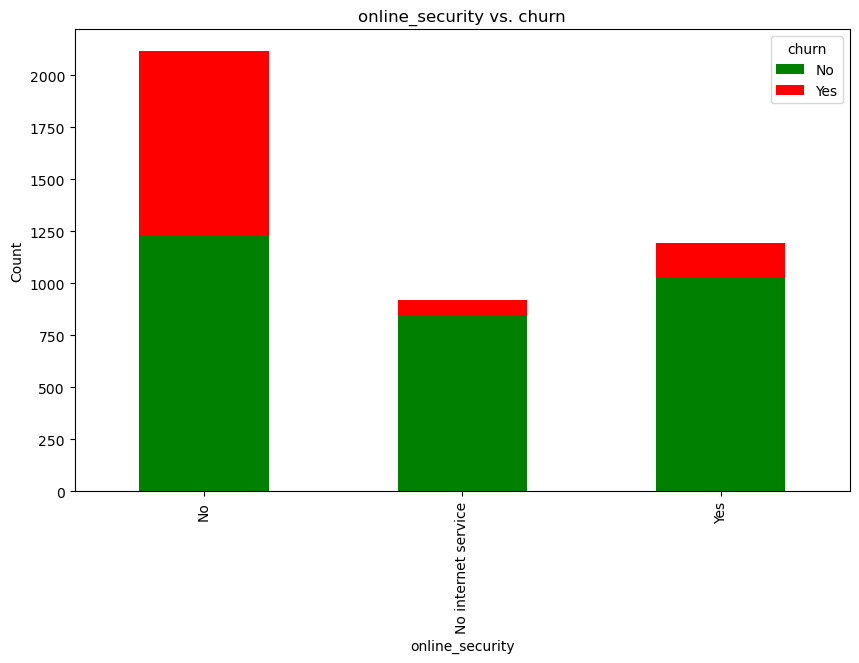


Contingency Table for online_backup vs. churn:

churn                  No  Yes
online_backup                 
No                   1097  732
No internet service   848   70
Yes                  1159  319


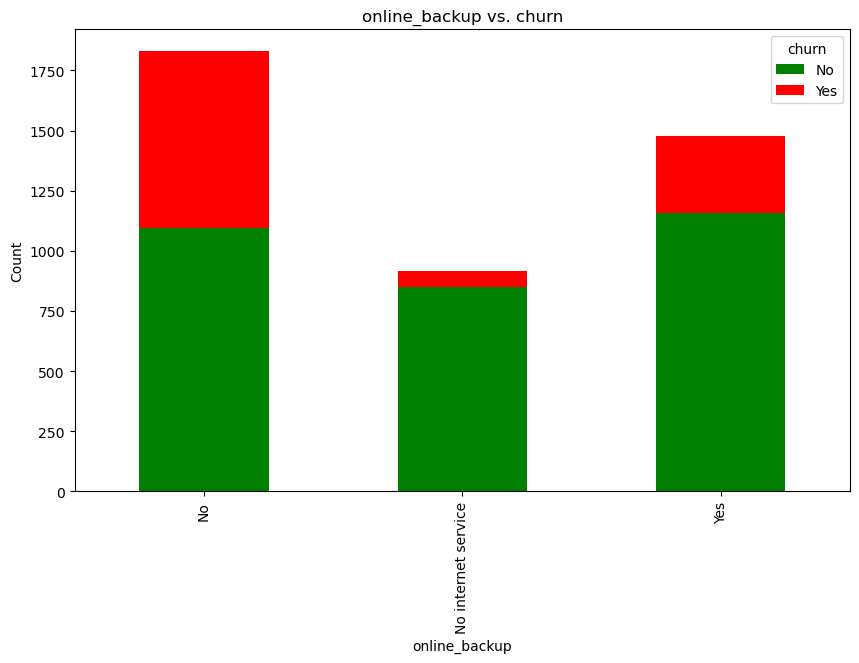


Contingency Table for device_protection vs. churn:

churn                  No  Yes
device_protection             
No                   1119  702
No internet service   848   70
Yes                  1137  349


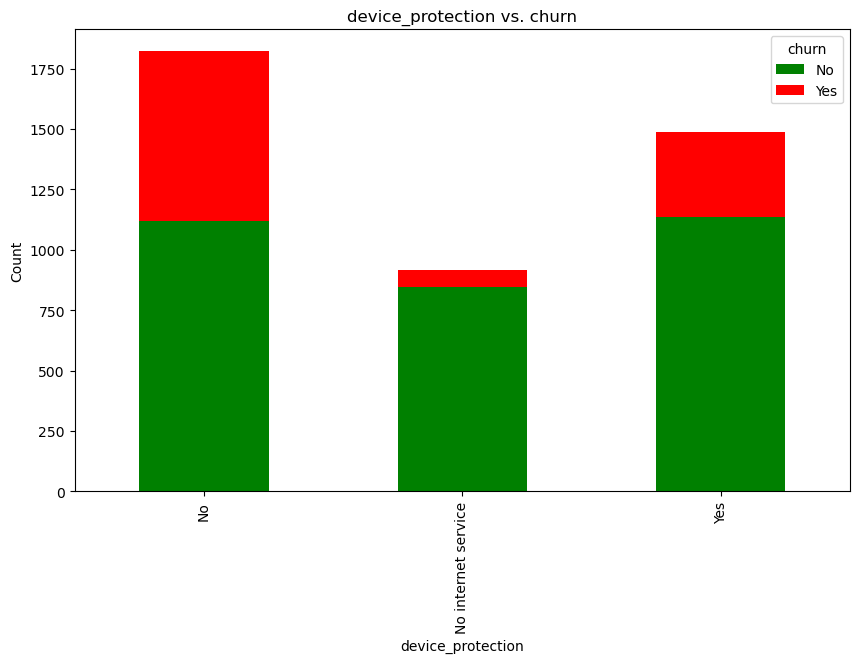


Contingency Table for tech_support vs. churn:

churn                  No  Yes
tech_support                  
No                   1230  866
No internet service   848   70
Yes                  1026  185


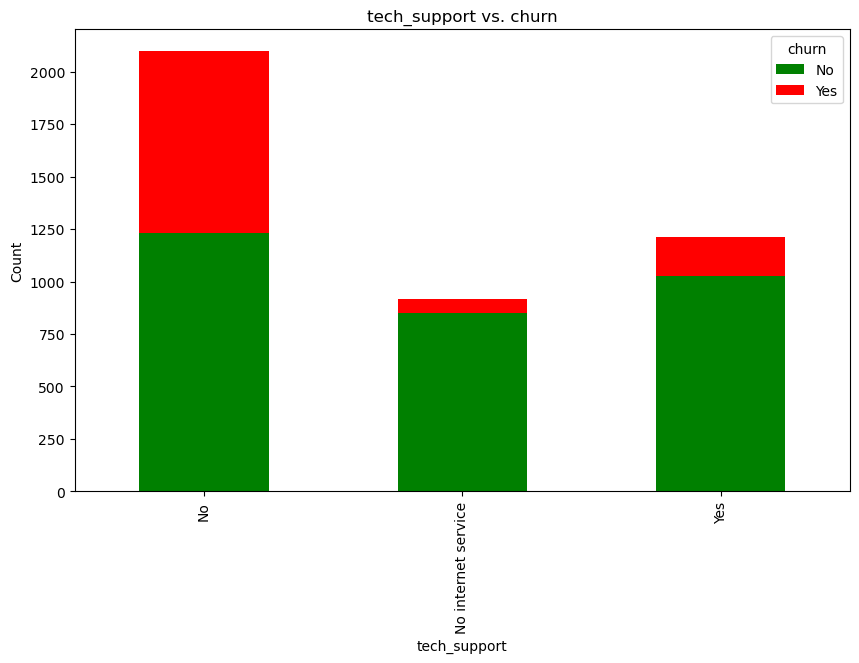


Contingency Table for streaming_tv vs. churn:

churn                  No  Yes
streaming_tv                  
No                   1100  573
No internet service   848   70
Yes                  1156  478


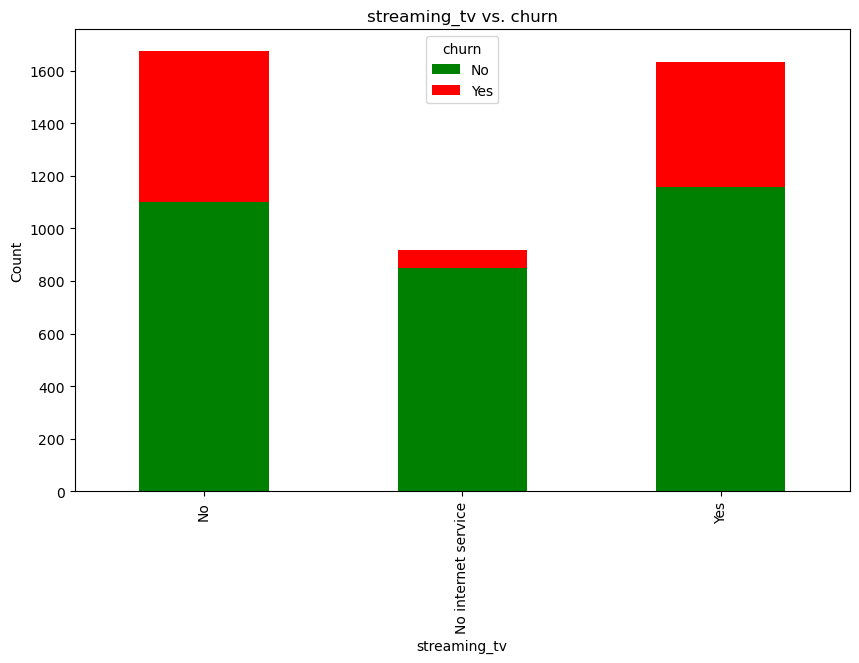


Contingency Table for streaming_movies vs. churn:

churn                  No  Yes
streaming_movies              
No                   1101  554
No internet service   848   70
Yes                  1155  497


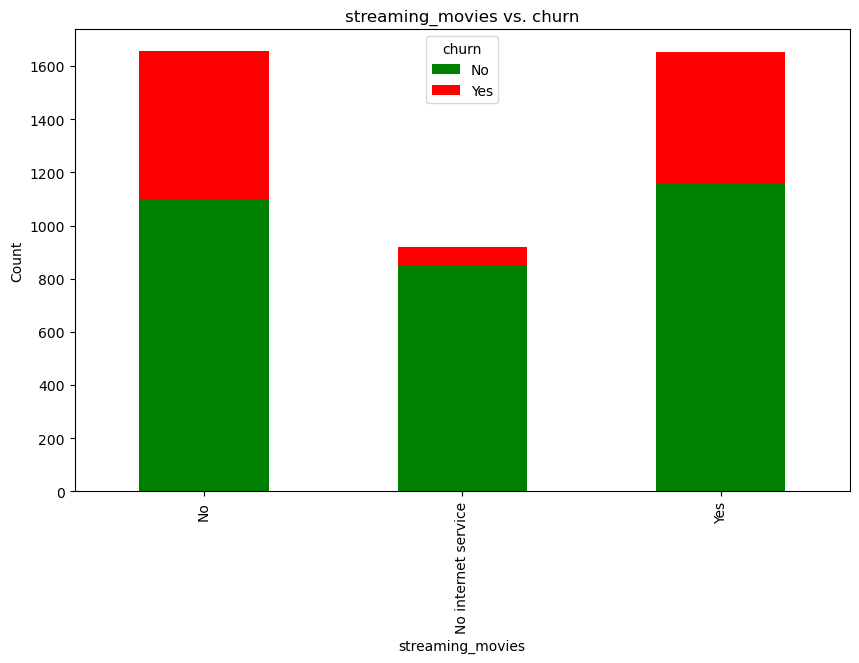


Contingency Table for paperless_billing vs. churn:

churn                No  Yes
paperless_billing           
No                 1437  281
Yes                1667  840


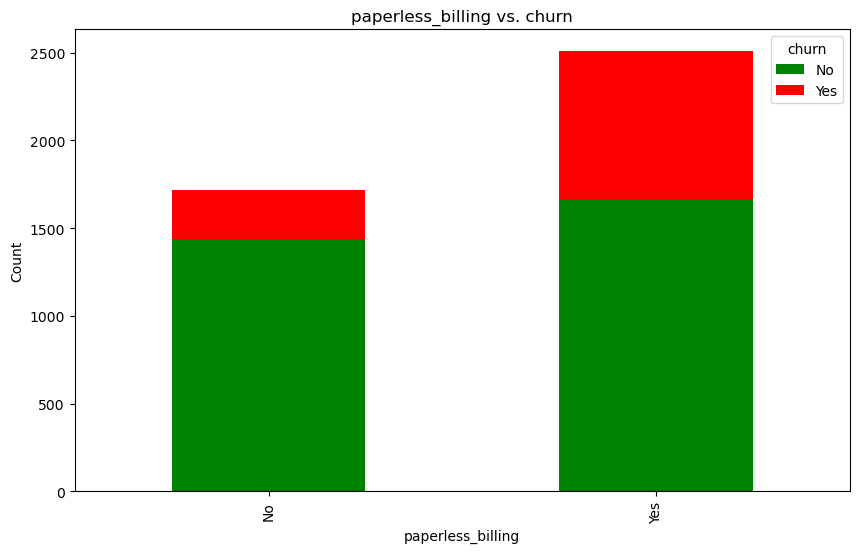


Contingency Table for contract_type vs. churn:

churn             No  Yes
contract_type            
Month-to-month  1338  997
One year         785   94
Two year         981   30


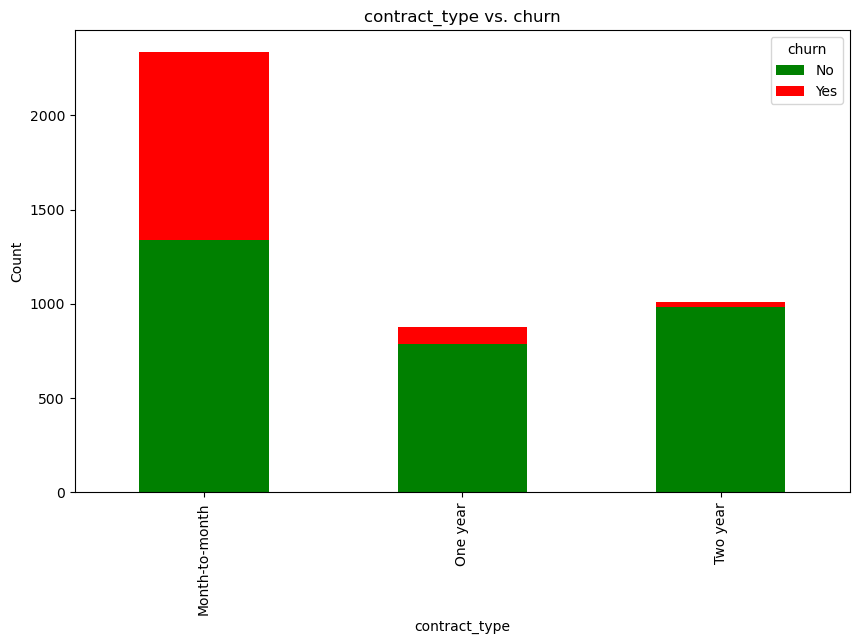


Contingency Table for internet_service_type vs. churn:

churn                    No  Yes
internet_service_type           
DSL                    1140  269
Fiber optic            1116  782
No internet service     848   70


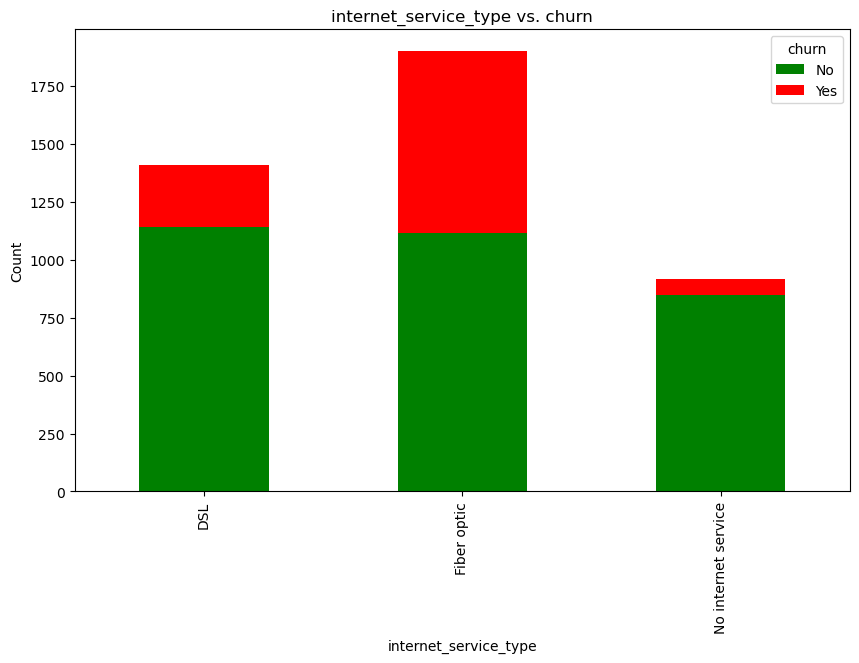


Contingency Table for payment_type vs. churn:

churn                       No  Yes
payment_type                       
Bank transfer (automatic)  778  157
Credit card (automatic)    783  138
Electronic check           788  646
Mailed check               755  180


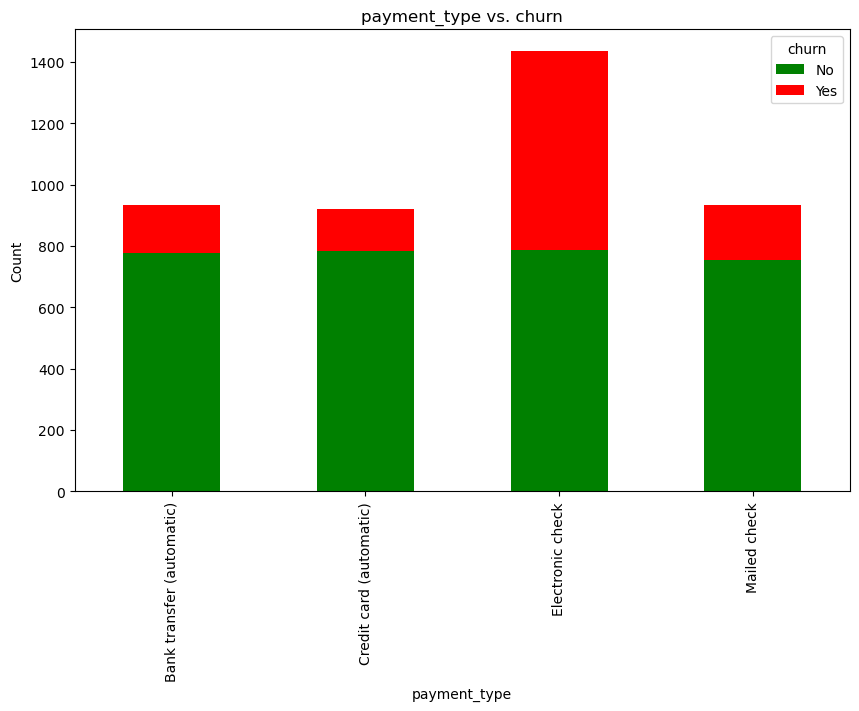

'\nfound relationships with payment type and churn, contract type and churn, and tenure and churn.\n'

In [17]:
# For loop to create contingency table and bar plot for each comparision column vs churn
# describe and visualize the distribution of categorical variables and make inferences about 
# the equality of proportions, independence of the variables, or agreement between variables.
for column in columns_to_compare:
    # Create a contingency table
    contingency_table = pd.crosstab(train[column], train[target_variable])
    
    # Display the contingency table
    print(f"\nContingency Table for {column} vs. {target_variable}:\n")
    print(contingency_table)
    
    # To help visualize the contingency table, we can use a stacked bar plot
    contingency_table.plot.bar(stacked=True, color=['green', 'red'], figsize=(10, 6))
    plt.title(f'{column} vs. {target_variable}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
# the x axis is the contingency_table index stacked on top of eachother 
# the y asis is the count of the customers that fall in each category. 
# this bar graph shows the distribution of a categorical variable by displaying each variable as its own bar 
# bar height represents the number of individuals belonging to that category.
# it helps visualize the contingency table

'''
so far found relationships with payment type and churn, contract type and churn, and tenure and churn.
'''

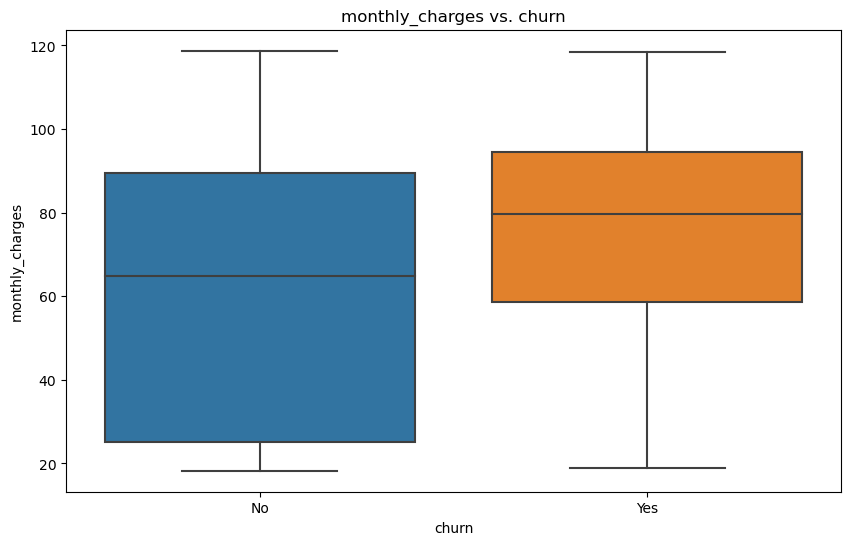

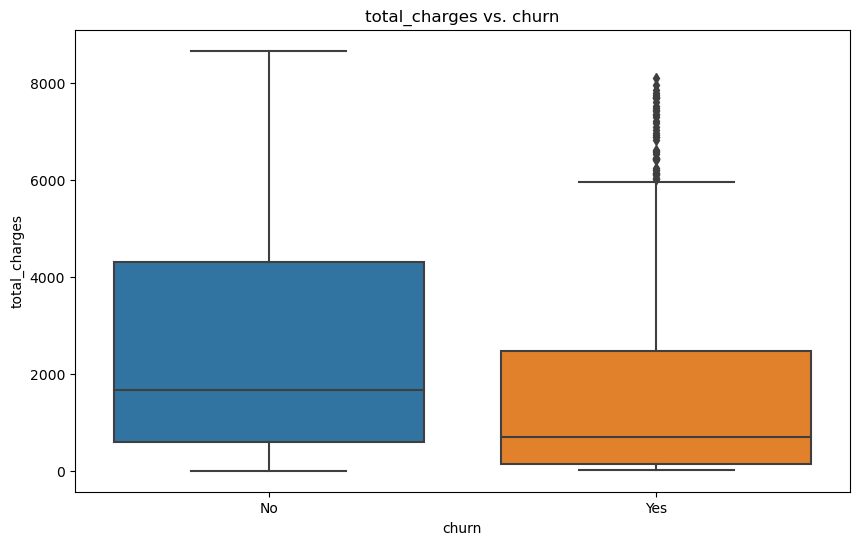

In [18]:
# Target variable
target_variable = 'churn'

# Create a for loop to compare each continuous variable to the target variable
for column in con_col:
    # Visualize the distribution of the continuous variable 
    plt.figure(figsize=(10, 6))
    # Box plot with target variable and count
    sns.boxplot(x=target_variable, y=column, data=train)
    plt.title(f'{column} vs. {target_variable}')
    plt.xlabel(target_variable)
    plt.ylabel(column)
    plt.show()


Contingency Table for gender vs. churn:

churn     No  Yes
gender           
Female  1550  559
Male    1554  562


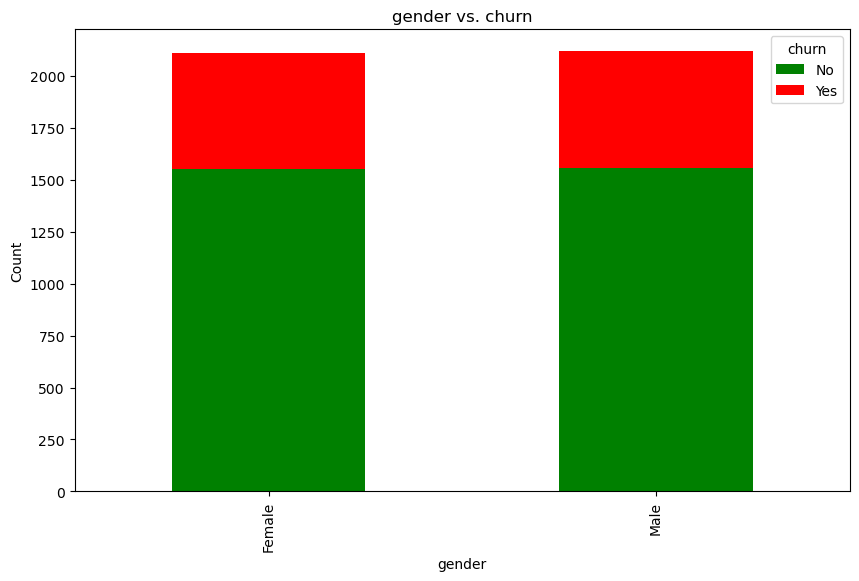


Contingency Table for senior_citizen vs. churn:

churn             No  Yes
senior_citizen           
No              2696  835
Yes              408  286


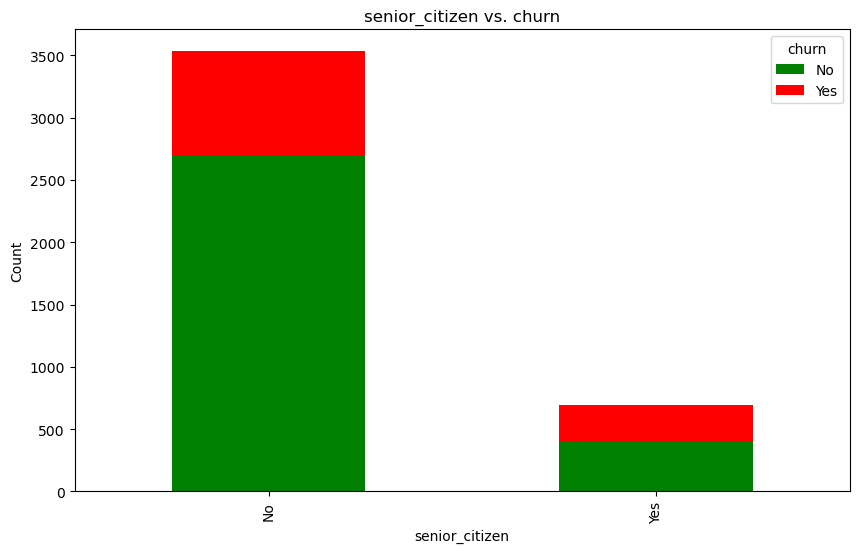


Contingency Table for partner vs. churn:

churn      No  Yes
partner           
No       1445  715
Yes      1659  406


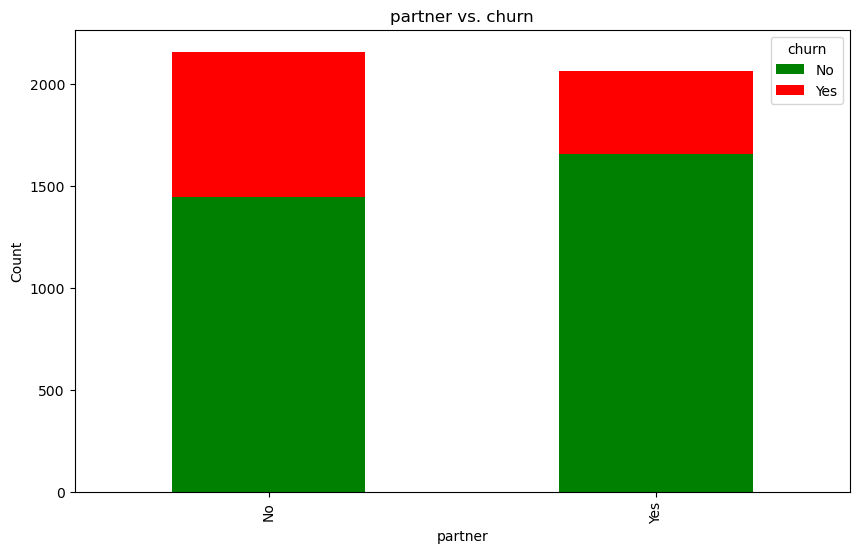


Contingency Table for dependents vs. churn:

churn         No  Yes
dependents           
No          2042  919
Yes         1062  202


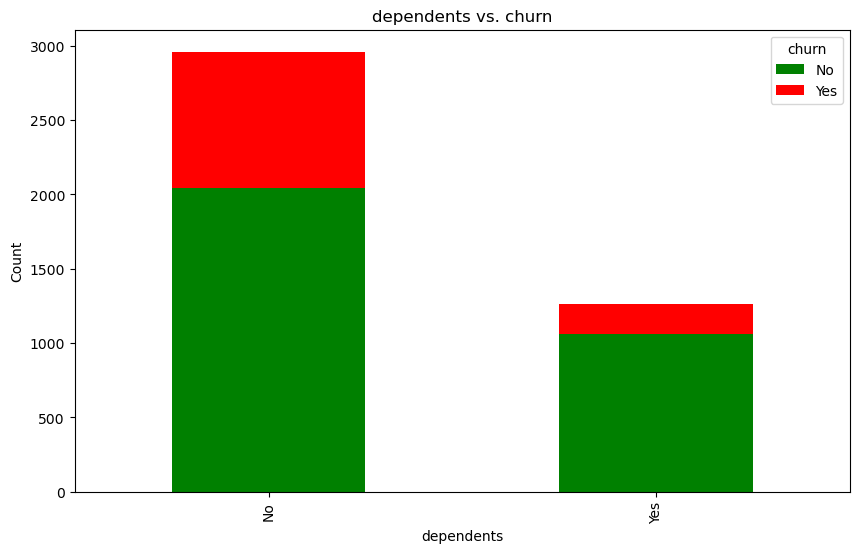


Contingency Table for tenure vs. churn:

churn    No  Yes
tenure          
0         8    0
1       128  225
2        61   81
3        67   57
4        57   51
...     ...  ...
68       51    6
69       60    4
70       65    5
71       94    4
72      228    5

[73 rows x 2 columns]


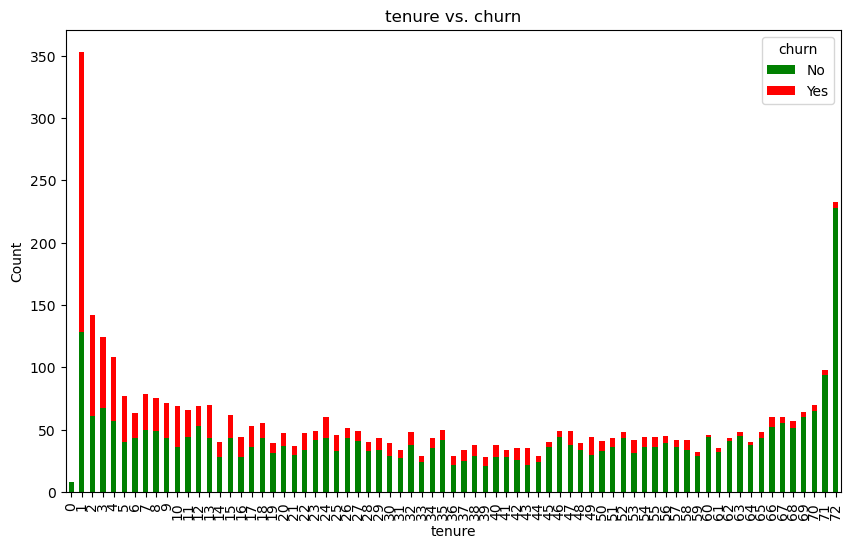


Contingency Table for phone_service vs. churn:

churn            No   Yes
phone_service            
No              295    99
Yes            2809  1022


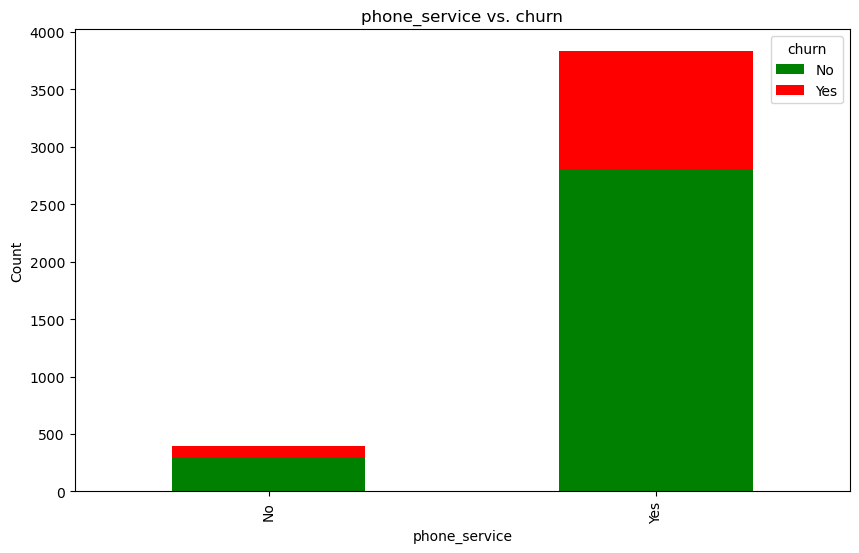


Contingency Table for multiple_lines vs. churn:

churn               No  Yes
multiple_lines             
No                1500  520
No phone service   295   99
Yes               1309  502


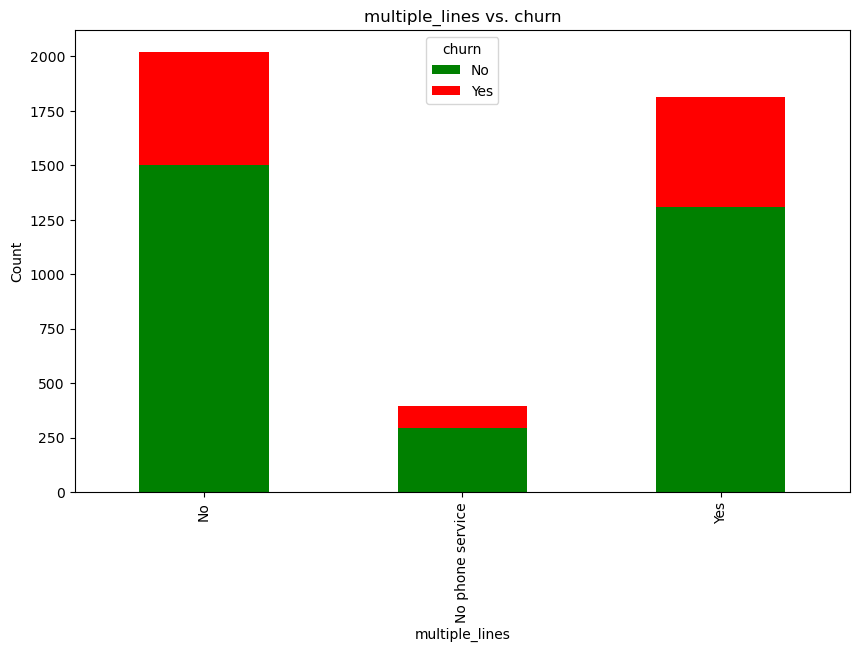


Contingency Table for online_security vs. churn:

churn                  No  Yes
online_security               
No                   1230  885
No internet service   848   70
Yes                  1026  166


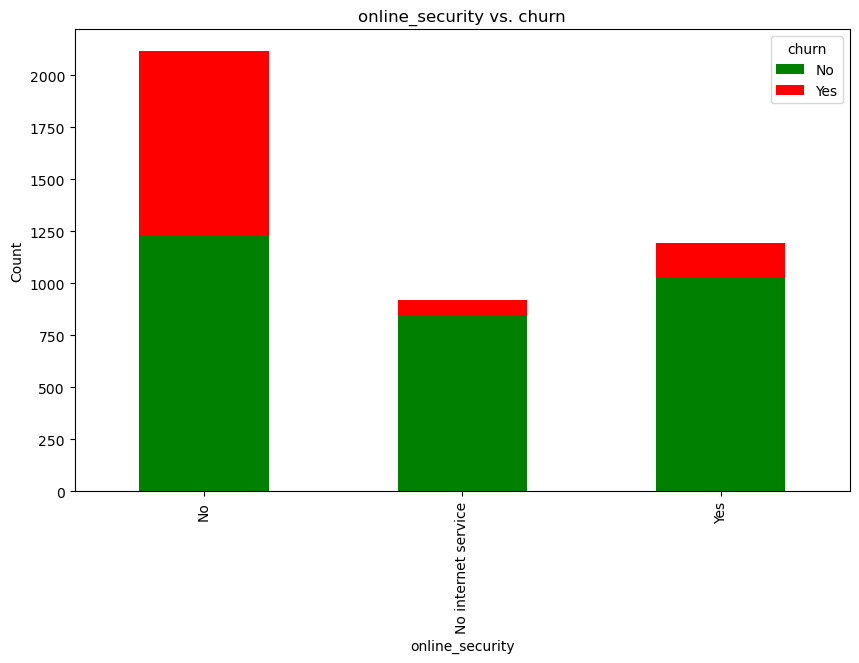


Contingency Table for online_backup vs. churn:

churn                  No  Yes
online_backup                 
No                   1097  732
No internet service   848   70
Yes                  1159  319


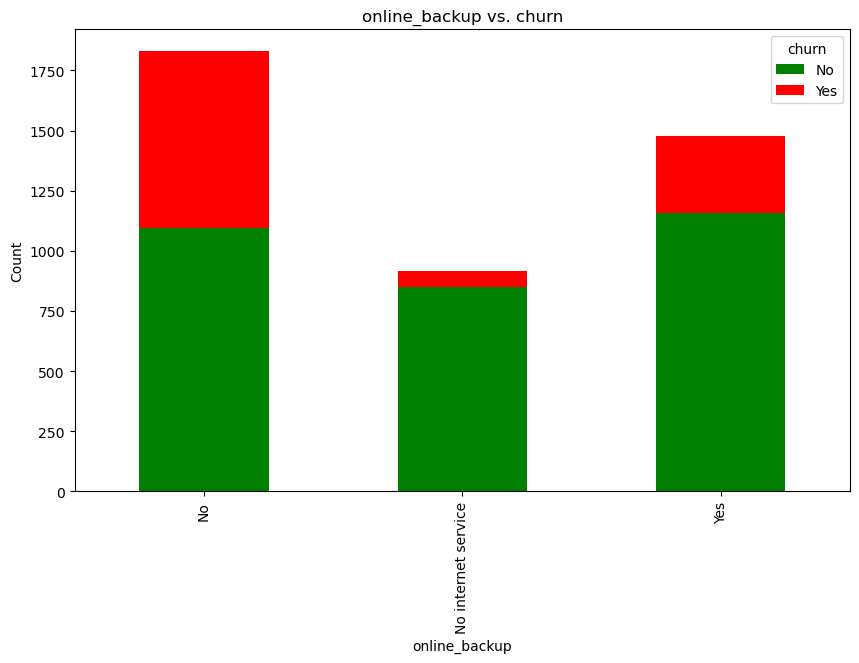


Contingency Table for device_protection vs. churn:

churn                  No  Yes
device_protection             
No                   1119  702
No internet service   848   70
Yes                  1137  349


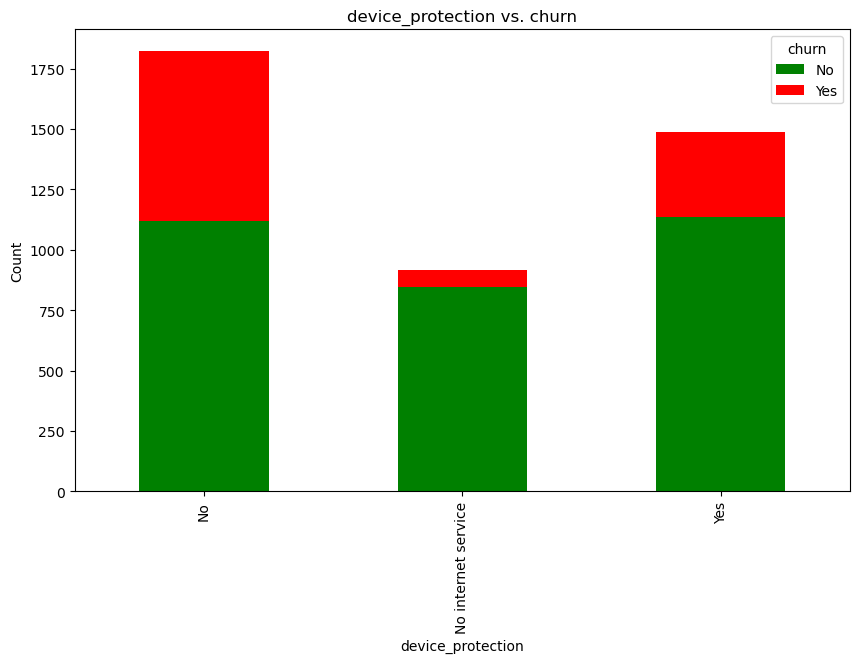


Contingency Table for tech_support vs. churn:

churn                  No  Yes
tech_support                  
No                   1230  866
No internet service   848   70
Yes                  1026  185


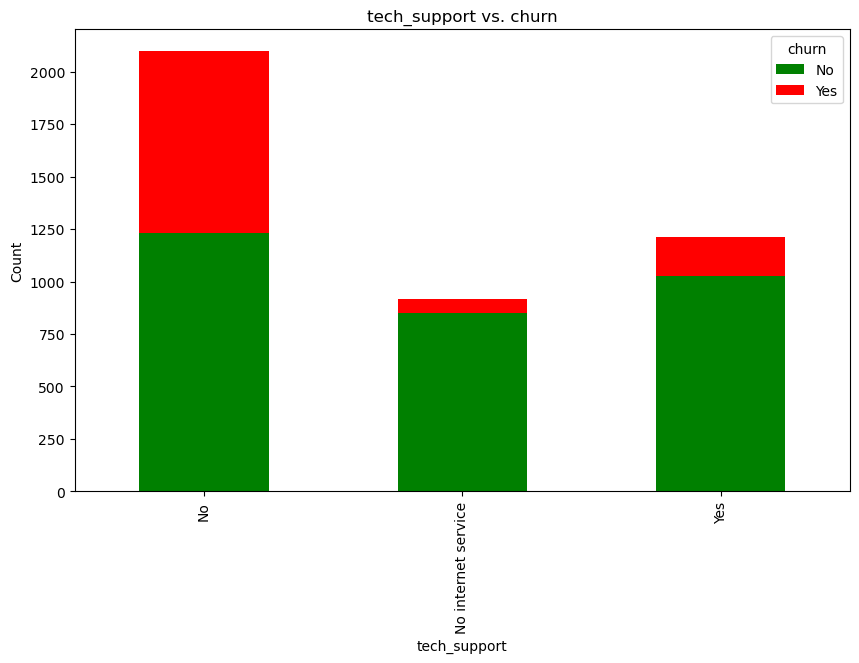


Contingency Table for streaming_tv vs. churn:

churn                  No  Yes
streaming_tv                  
No                   1100  573
No internet service   848   70
Yes                  1156  478


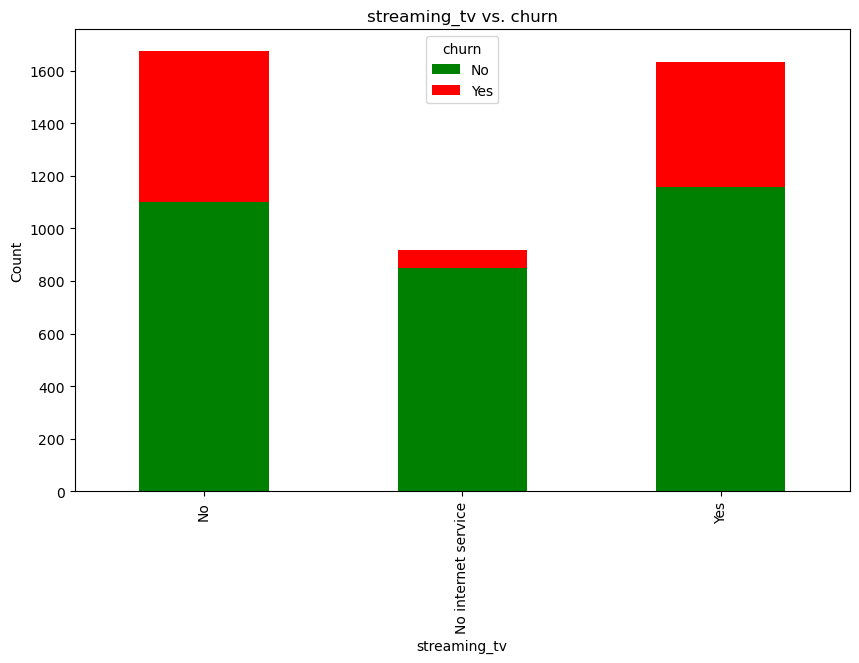


Contingency Table for streaming_movies vs. churn:

churn                  No  Yes
streaming_movies              
No                   1101  554
No internet service   848   70
Yes                  1155  497


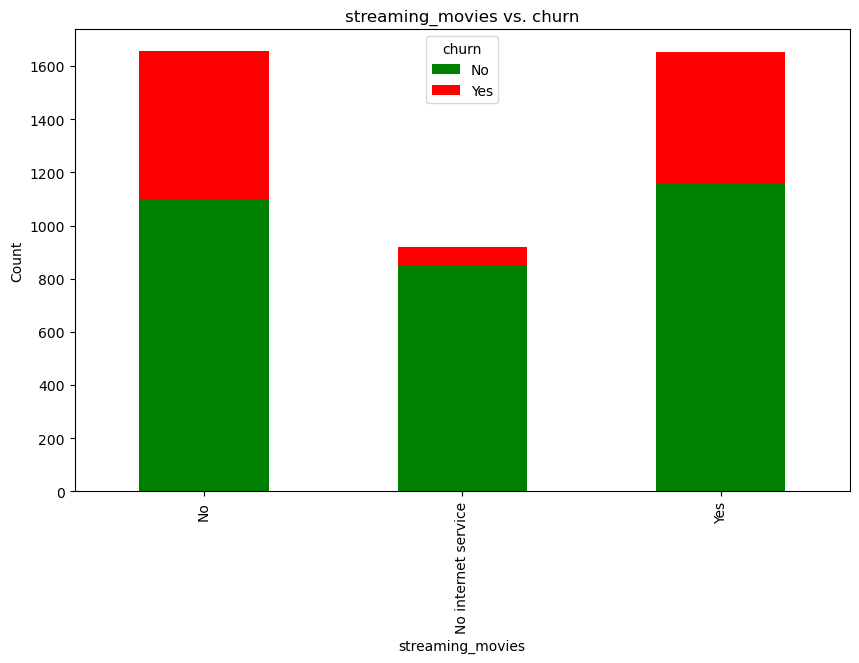


Contingency Table for paperless_billing vs. churn:

churn                No  Yes
paperless_billing           
No                 1437  281
Yes                1667  840


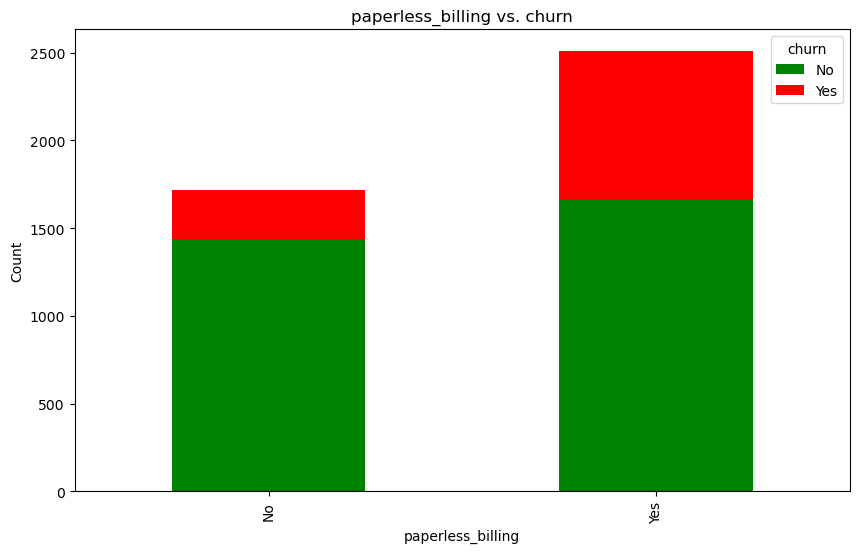


Contingency Table for monthly_charges vs. churn:

churn            No  Yes
monthly_charges         
18.25             1    0
18.40             1    0
18.55             1    0
18.70             1    0
18.75             1    0
...              ..  ...
118.20            1    0
118.35            0    1
118.60            1    0
118.65            1    0
118.75            1    0

[1374 rows x 2 columns]


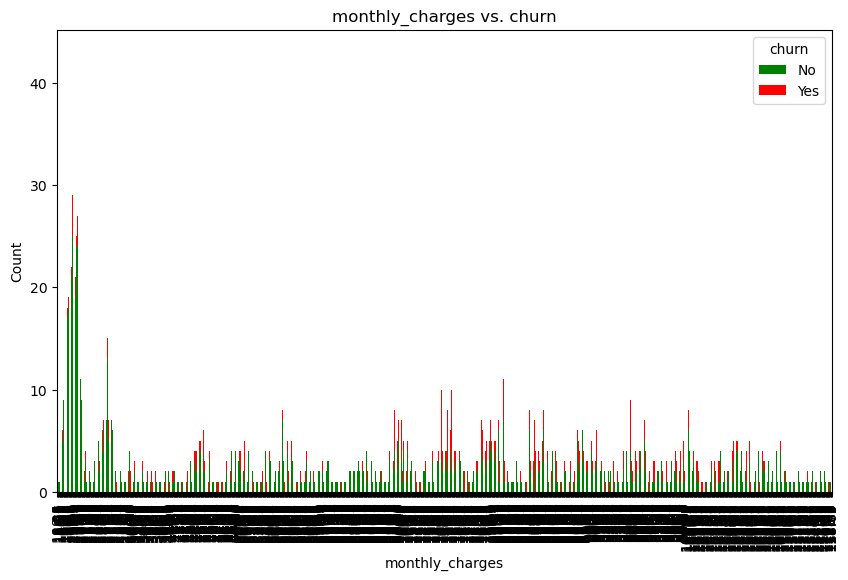


Contingency Table for total_charges vs. churn:

churn          No  Yes
total_charges         
0.00            8    0
18.85           1    1
18.90           1    0
19.05           1    0
19.10           2    0
...            ..  ...
8477.70         1    0
8547.15         1    0
8594.40         1    0
8670.10         1    0
8672.45         1    0

[4006 rows x 2 columns]


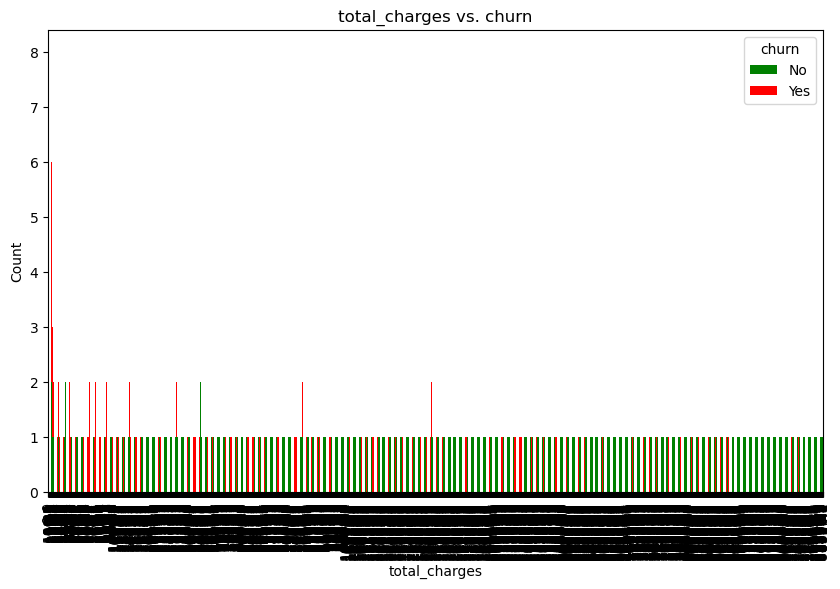


Contingency Table for contract_type vs. churn:

churn             No  Yes
contract_type            
Month-to-month  1338  997
One year         785   94
Two year         981   30


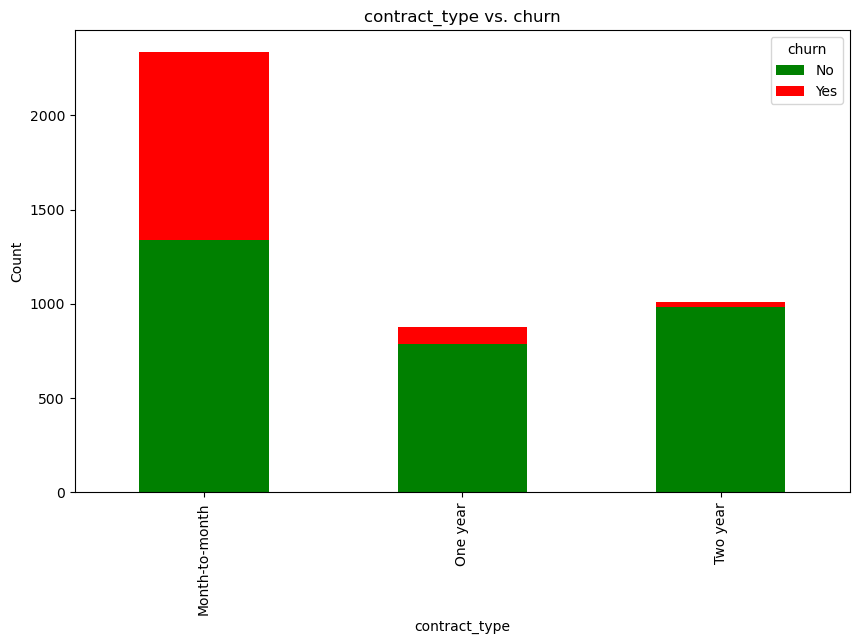


Contingency Table for internet_service_type vs. churn:

churn                    No  Yes
internet_service_type           
DSL                    1140  269
Fiber optic            1116  782
No internet service     848   70


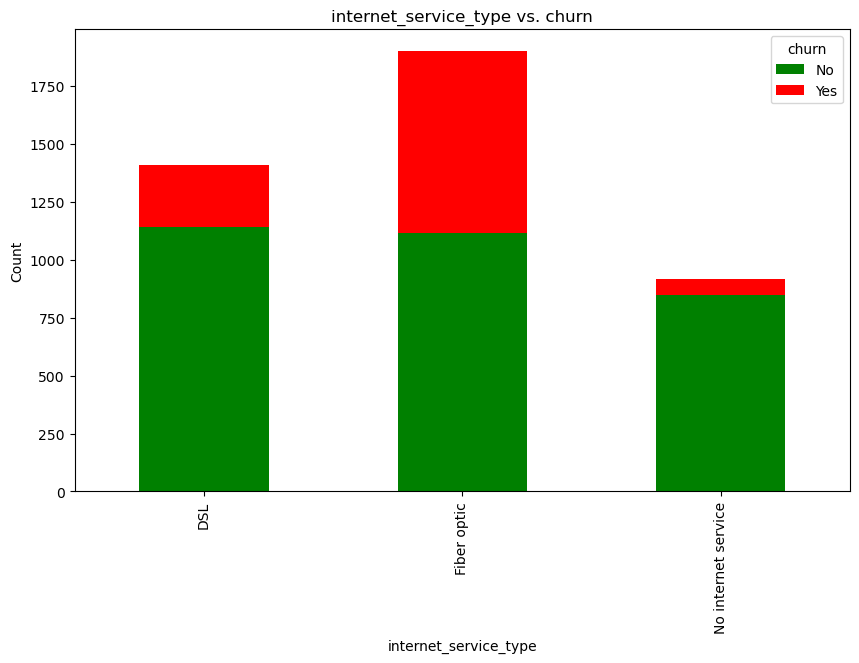


Contingency Table for payment_type vs. churn:

churn                       No  Yes
payment_type                       
Bank transfer (automatic)  778  157
Credit card (automatic)    783  138
Electronic check           788  646
Mailed check               755  180


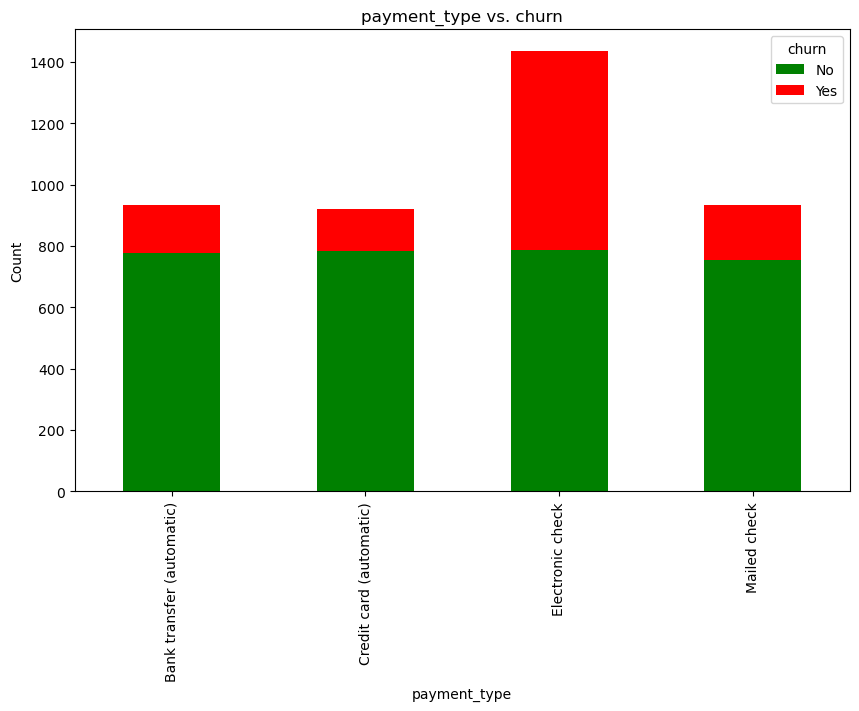

In [25]:
# Target variable
target_variable = 'churn'

# Create an empty list to store columns for comparison
columns_to_compare = []

# Create a for loop to iterate through each column in the train df, appending our list except for the target 
for column in train.columns:
    if column != target_variable:
        columns_to_compare.append(column)
            
# For loop to create contingency table and bar plot for each column vs churn 
for column in columns_to_compare:
    # Create a contingency table
    contingency_table = pd.crosstab(train[column], train[target_variable])
    
    # Display the contingency table
    print(f"\nContingency Table for {column} vs. {target_variable}:\n")
    print(contingency_table)
    
    # Visualize the contingency table with a stacked bar plot
    # stacked bar plot will visually compare the count of variables.
    contingency_table.plot.bar(stacked=True, color=['green', 'red'], figsize=(10, 6))
    plt.title(f'{column} vs. {target_variable}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()
# since contingency_table has a clear structure, the plot method can infer the appropriate axes.
# the x axis is the contingency_table index stacked on top of eachother 
# the y asis is the count of each variable stacked on top of eachother. 



# FIRST RELATIONSHIP

 1. Hypothesize

Q: does payment type affect whether or not someone churned?

In [14]:
train.payment_type.value_counts()

payment_type
Electronic check             1434
Mailed check                  935
Bank transfer (automatic)     935
Credit card (automatic)       921
Name: count, dtype: int64

In [16]:
train.churn.value_counts()

churn
No     3104
Yes    1121
Name: count, dtype: int64

2. Visualize

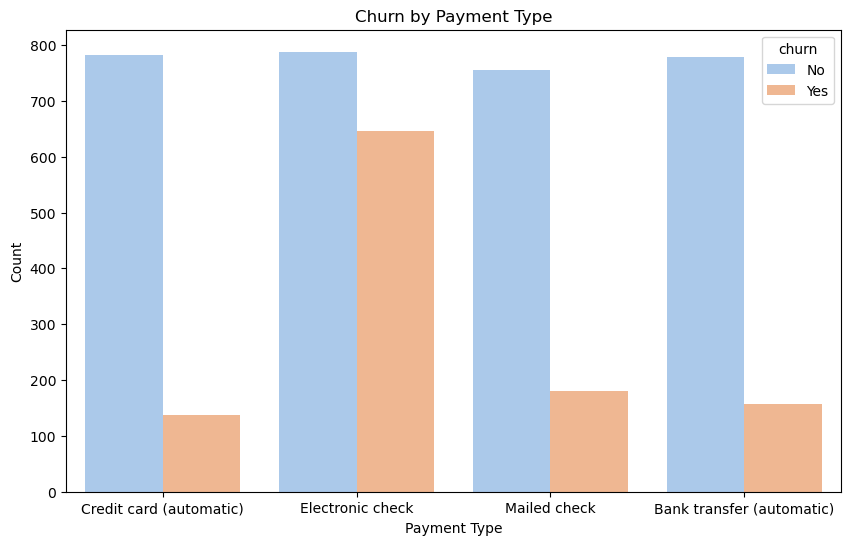

In [24]:
# customers with electronic check payment types churned a lot
plt.figure(figsize=(10, 6))
sns. countplot(x='payment_type', hue='churn', data=train, palette='pastel')
plt.title('Churn by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

> customers with electronic check payment type churned a lot more than other payment types. 

3. Analyze with stats

two categorical variables, we can use chi^2

In [ ]:
# make hypothesis and set significance level 

$H_0$: There is no relationship between payment type and whether or not someone has churned

$H_a$: There is a relationship between payment type and whether or not someone has churned

In [27]:
alpha = 0.05

In [25]:
# create crosstab
observed = pd.crosstab(train.churn, train.payment_type)

In [26]:
observed

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
No,778,783,788,755
Yes,157,138,646,180


In [28]:
#chi2_contingency prints out 4 values - chi2, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [30]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[778 783 788 755]
 [157 138 646 180]]

Expected
[[ 686  676 1053  686]
 [ 248  244  380  248]]

----
chi^2 = 386.1840
p     = 0.0000


In [31]:
# State your conclusion
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')


reject the null hypothesis


In [ ]:
# we reject the null hypothesis
# There is a relationship between payment type and whether or not someone churned

4. Summarize

One particular type of payment method shows a lot of customer churn. Maybe this is due to some factor related to costs, fees, or delivery speed. Will need to investigate further asking are there fees associated with each payment type, what are their delivery speeds?

# Second Relationship

 1. Hypothesize

Q: does contract type affect whether or not someone has churned?

What are churn and contract type? Two categorical variables.

In [34]:
train.contract_type.value_counts()

contract_type
Month-to-month    2335
Two year          1011
One year           879
Name: count, dtype: int64

In [35]:
train.churn.value_counts()

churn
No     3104
Yes    1121
Name: count, dtype: int64

2. Visualize

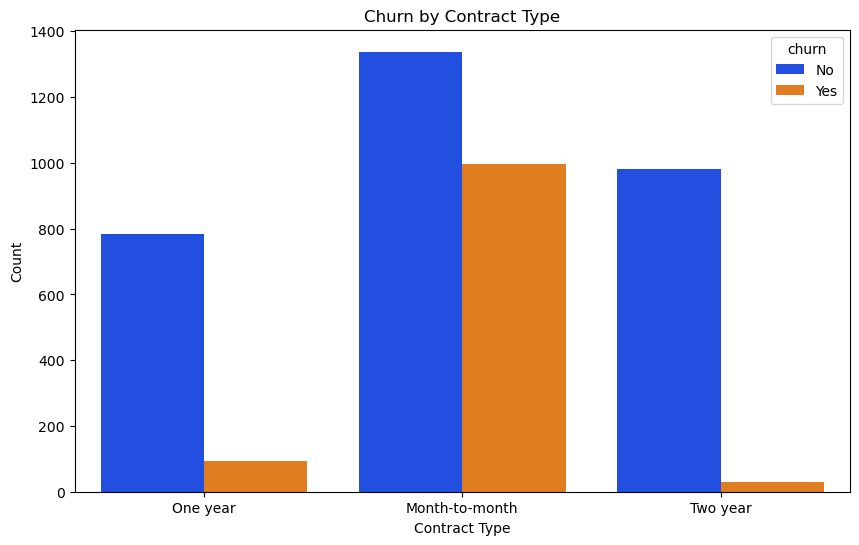

In [39]:
# customers with month to month contract types churned a lot
plt.figure(figsize=(10, 6))
sns. countplot(x='contract_type', hue='churn', data=train, palette='bright')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

> customers with month to month contract types churn mroe than other contract types

3. Analyze with stats

two categorical variables, we can use chi^2

In [ ]:
# make hypothesis and set significance level 

$H_0$: There is no relationship between contract type and whether or not someone has churned

$H_a$: There is a relationship between contract type and whether or not someone has churned

In [45]:
alpha = 0.05

In [46]:
# create crosstab
observed_ct = pd.crosstab(train.churn, train.contract_type)
observed_ct

contract_type,Month-to-month,One year,Two year
churn,,,
No,1338,785,981
Yes,997,94,30


In [47]:
#chi2_contingency prints out 4 values - chi2, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = stats.chi2_contingency(observed_ct)

In [48]:
#output values
print('Observed')
print(observed_ct.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1338  785  981]
 [ 997   94   30]]

Expected
[[1715  645  742]
 [ 619  233  268]]

----
chi^2 = 714.1745
p     = 0.0000


In [49]:
# State your conclusion
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')


reject the null hypothesis


In [ ]:
# we reject the null hypothesis
# There is a relationship between contract type and whether or not someone churned

4. Summarize

One particular contract type (month-to-month) has a lot of customers with churned status. This would make sense becuase people with long contracts can not churn as easily as customers with month to month contracts. However, I would like to examine if contract type and tenure relates to churn. 

# Third Relationship

 1. Hypothesize

Q: does tenure affect whether or not someone has churned?

What are churn and tenure? One categorical variable and one continuous variable? Maybe, unless we bin tenure into years instead of months.

In [71]:
train.tenure.value_counts()

tenure
1     353
72    233
2     142
3     124
4     108
     ... 
36     29
33     29
44     29
39     28
0       8
Name: count, Length: 73, dtype: int64

In [63]:
train.churn.value_counts()

churn
No     3104
Yes    1121
Name: count, dtype: int64

2. Visualize

<Axes: xlabel='churn', ylabel='tenure'>

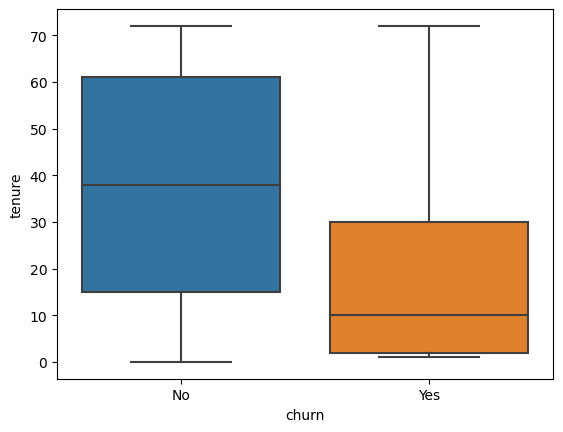

In [65]:
sns.boxplot(data=train, x='churn', y='tenure')

> it appears customers are churning early on in their tenure. Customers who have stayed with telco are still with telco

3. Analyze with statistics

comparing categorical to categorical because we are going to bin tenure into years, of which the higest tenure is 72 months.

In [32]:
# Create bins for tenure in terms of years
bins = [0, 12, 24, 36, 48, 60, 72, 84]  # adjust as needed

# Create labels for the bins (representing years)
labels = ['0', '1', '2', '3', '4', '5', '6']

# Bin the 'tenure' column
train['tenure_years'] = pd.cut(train['tenure'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new 'tenure_years' column
print(train[['tenure', 'tenure_years']])


      tenure tenure_years
2865      38            3
4107       2            0
3453      11            0
923       10            0
2370      43            3
...      ...          ...
1286       1            0
4999      47            3
6892      72            6
3718       8            0
5354      13            1

[4225 rows x 2 columns]


In [33]:
train.tenure_years.value_counts()

tenure_years
0    1235
5     669
1     612
2     532
4     506
3     438
6     233
Name: count, dtype: int64

In [34]:
observed_tenure = pd.crosstab(train.churn, train.tenure_years)
observed_tenure

tenure_years,0,1,2,3,4,5,6
churn,,,,,,,
No,626,448,422,343,417,620,228
Yes,609,164,110,95,89,49,5


two categorical variables, we can use chi^2

In [ ]:
# make hypothesis and set significance level 

$H_0$: There is no relationship between tenure and whether or not someone has churned

$H_a$: There is a relationship between tenure and whether or not someone has churned

In [14]:
alpha = 0.05

In [18]:
#chi2_contingency prints out 4 values - chi2, p-value, degrees of freedom, and expected values
chi2, p, dof, expected = stats.chi2_contingency(observed_tenure)

In [19]:
#output values
print('Observed')
print(observed_tenure.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[626 448 422 343 417 620 228]
 [609 164 110  95  89  49   5]]

Expected
[[907 449 390 321 371 491 171]
 [327 162 141 116 134 177  61]]

----
chi^2 = 561.8805
p     = 0.0000


In [20]:
# State your conclusion
#compare our p-value and alpha
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


In [ ]:
# we reject the null hypothesis
# There is a relationship between tenure and whether or not someone churned

4. Summarize

New customers churn more often than customers with high tenure.

# Fourth Relationship

In [24]:
train.internet_service_type.value_counts()

internet_service_type
Fiber optic            1898
DSL                    1409
No internet service     918
Name: count, dtype: int64


monthly charges and total charges and internet service type

In [ ]:
# make new columns to separate automatic payments from manual payments
# df["automatic_payments"] = (df["payment_type"] == "Bank transfer (automatic)") | (df["payment_type"] == "Credit card (automatic)")
# df["manual_payments"] = (df["payment_type"] == "Electronic check") | (df["payment_type"] == "Mailed check")